In [1]:
!pip install numpy pandas matplotlib scikit-learn


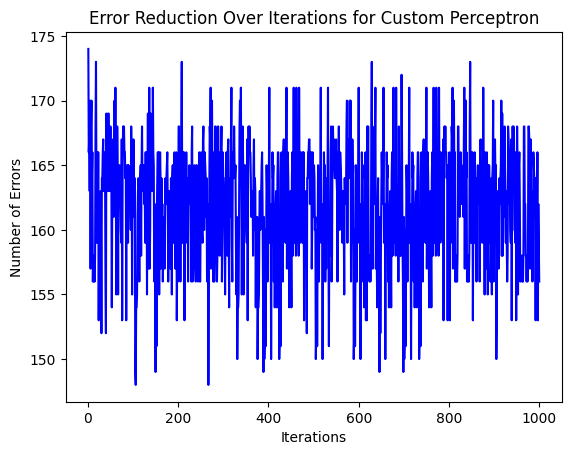

Custom Perceptron Accuracy: 73.43%
Scikit-learn Perceptron Accuracy: 67.13%


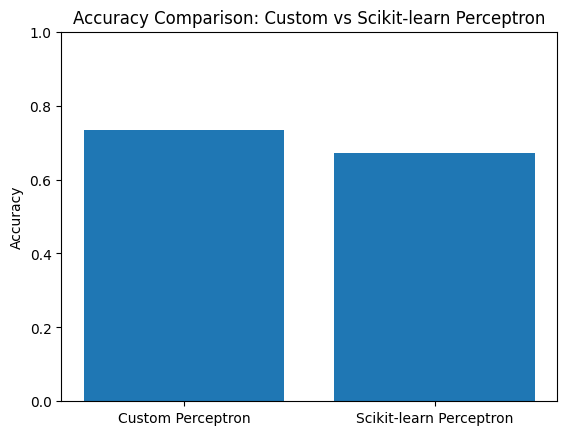

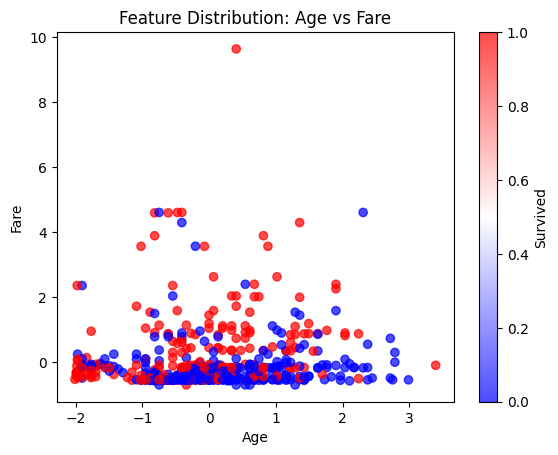

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Load and preprocess the Titanic dataset
url = '/content/Titanic-Dataset.csv'
data = pd.read_csv(url)

data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = data.dropna()

X = data[['Pclass', 'Sex', 'Age', 'Fare']].values
y = data['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


class PerceptronWithVisualization:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = 0
        self.errors = []

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        for _ in range(self.n_iterations):
            error_count = 0
            for i in range(len(X)):
                activation = np.dot(X[i], self.weights) + self.bias
                predicted = 1 if activation >= 0 else 0
                error = y[i] - predicted
                if error != 0:
                    error_count += 1
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
            self.errors.append(error_count)

    def predict(self, X):
        activation = np.dot(X, self.weights) + self.bias
        return np.where(activation >= 0, 1, 0)


model = PerceptronWithVisualization(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)


plt.plot(range(1, 1001), model.errors, color='b')
plt.xlabel('Iterations')
plt.ylabel('Number of Errors')
plt.title('Error Reduction Over Iterations for Custom Perceptron')
plt.show()


y_pred_custom = model.predict(X_test)
accuracy_custom = np.mean(y_pred_custom == y_test)


print(f'Custom Perceptron Accuracy: {accuracy_custom * 100:.2f}%')


sklearn_model = Perceptron(max_iter=1000, eta0=0.01)
sklearn_model.fit(X_train, y_train)


y_pred_sklearn = sklearn_model.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)


print(f'Scikit-learn Perceptron Accuracy: {accuracy_sklearn * 100:.2f}%')


plt.bar(['Custom Perceptron', 'Scikit-learn Perceptron'], [accuracy_custom, accuracy_sklearn])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Custom vs Scikit-learn Perceptron')
plt.ylim(0, 1)
plt.show()


plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap='bwr', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Feature Distribution: Age vs Fare')
plt.colorbar(label='Survived')
plt.show()
